<a href="https://colab.research.google.com/github/Mitali2303/Probability-Projects-/blob/main/23110206_Probability_Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = sns.load_dataset(name='iris')

In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Q1.  Estimate the covariance matrix of the 4 attributes.

In [ ]:
def covariance(x, y):
    n = len(x)

    # Calculate means
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    # Calculate numerator and denominators
    numerator = np.sum((x - mean_x) * (y - mean_y))
    denominator=n-1

    # Calculate covariance coefficient
    covariance_coefficient = numerator/denominator

    return covariance_coefficient

In [ ]:
def correlation(x, y):
    n = len(x)

    # Calculate means
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    # Calculate numerator and denominators
    numerator = np.sum((x - mean_x) * (y - mean_y))
    denominator_x = np.sqrt(np.sum((x - mean_x)**2))
    denominator_y = np.sqrt(np.sum((y - mean_y)**2))

    # Calculate correlation coefficient
    correlation_coefficient = numerator / (denominator_x * denominator_y)

    return correlation_coefficient

In [ ]:
att1 = data['sepal_length'].values
att2 = data['sepal_width'].values
att3 = data['petal_length'].values
att4 = data['petal_width'].values
arr=[att1,att2,att3,att4]
V=[]
for i in range(4):
  W=[]
  for j in range(4):
    W.append(covariance(arr[i],arr[j]))
  V.append(W)

# Define the data as a dictionary
da= {
    'sepal_length': V[0],
    'sepal_width': V[1],
    'petal_length': V[2],
    'petal_width': V[3]
}
# Create a DataFrame
covariance_df = pd.DataFrame(da, index=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

# Print the DataFrame
print('Covariance matrix:')
print(covariance_df)

V=[]
for i in range(4):
  W=[]
  for j in range(4):
    W.append(correlation(arr[i],arr[j]))
  V.append(W)


# Define the data as a dictionary
da= {
    'sepal_length': V[0],
    'sepal_width': V[1],
    'petal_length': V[2],
    'petal_width': V[3]
}

# Create a DataFrame
correlation_df = pd.DataFrame(da, index=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

# Print the DataFrame
print()
print('Correlation matrix (For standardizing the data):')
print(correlation_df)


Covariance matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      0.685694    -0.042434      1.274315     0.516271
sepal_width      -0.042434     0.189979     -0.329656    -0.121639
petal_length      1.274315    -0.329656      3.116278     1.295609
petal_width       0.516271    -0.121639      1.295609     0.581006

Correlation matrix (For standardizing the data):
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


Q2.  Estimate the four principal components of the data.

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(correlation_df)

for i in range(len(eigenvalues)):
  for j in range(i, len(eigenvalues)-1):
    if eigenvalues[j]<eigenvalues[j+1] :
      eigenvalues[j], eigenvalues[j+1]=eigenvalues[j+1],eigenvalues[j]
      eigenvectors[j], eigenvectors[j+1]=eigenvectors[j+1],eigenvectors[j]

for i in range(4):
  print('PCA',i+1,':',eigenvectors[i])


PCA 1 : [ 0.52106591 -0.37741762 -0.71956635  0.26128628]
PCA 2 : [-0.26934744 -0.92329566  0.24438178 -0.12350962]
PCA 3 : [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
PCA 4 : [ 0.56485654 -0.06694199  0.63427274  0.52359713]


Q3. Perform dimensionality reduction using PCA to reduce 150 data points into two dimensions and three dimensions.

In [ ]:
X=eigenvectors.T

data1 = data.drop(columns=['species'])

recast_data_2d=data1.dot(X[:,:2])
recast_data_3d=data1.dot(X[:,:3])
print('2D :')
print(recast_data_2d)
print()
print('3D :')
print(recast_data_3d.head())



2D :
            0         1
0    0.381339 -4.287774
1    0.465834 -3.772257
2    0.358094 -3.927485
3    0.199816 -3.759344
4    0.291491 -4.353169
..        ...       ...
145 -0.781898 -3.587802
146 -0.762217 -3.017887
147 -0.964497 -3.496879
148 -1.337311 -3.773570
149 -1.257437 -3.335007

[150 rows x 2 columns]

3D :
          0         1         2
0  0.381339 -4.287774  2.913073
1  0.465834 -3.772257  2.809236
2  0.358094 -3.927485  2.674043
3  0.199816 -3.759344  2.646876
4  0.291491 -4.353169  2.852583


Q4. Visualize the reduced dimension 150 data points in 2D and 3D while giving different colors to reduced data points of diff different species.

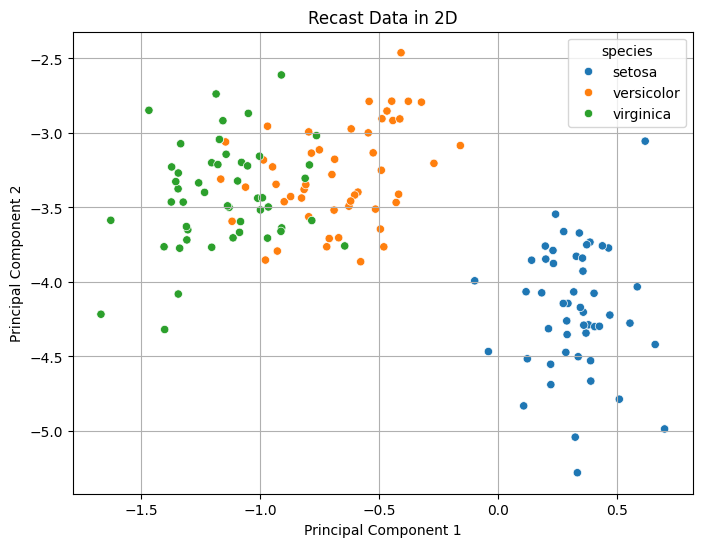

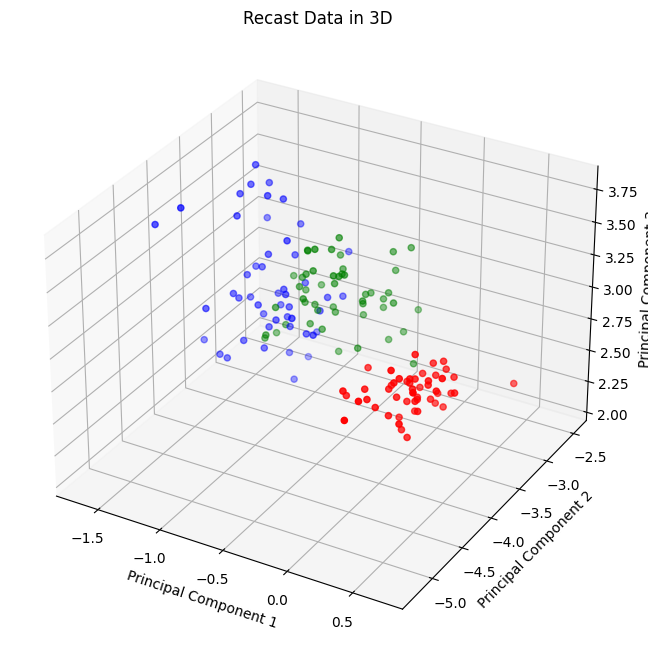

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=recast_data_2d.iloc[:, 0], y=recast_data_2d.iloc[:, 1], hue=data['species'])
plt.title('Recast Data in 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the recast 3D data
species_color = {'setosa': 'r', 'versicolor': 'g', 'virginica': 'b'}
colors = data['species'].map(species_color)
ax.scatter(recast_data_3d.iloc[:, 0], recast_data_3d.iloc[:, 1], recast_data_3d.iloc[:, 2], c=colors)

# Set labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Recast Data in 3D')

# Show plot
plt.show()
